In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [6]:
ChicagoSchools = pd.read_excel('C:/Users/Toni/Desktop/ChicagoPublicSchoolsElementary.xlsx')
ChicagoSchools.head()

,School ID,Name of School,Street Address,City,State,ZIP Code,Phone Number,Website,Blue Ribbon Award,CPS Performance Policy Level,...,Y Coordinate,Longitude,Latitude,Location,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,:@computed_region_awaf_s7ux
0,400048,LEARN Charter ES - Excel,2401 W Congress Pkwy,Chicago,IL,60612,(312) 243-7001,http://www.learncharter.org,NaN,LEVEL 2,...,1897662.506,41.874886,-87.686311,"{'latitude': '-87.68631142', 'longitude': '41....",NaN,NaN,NaN,NaN,NaN,NaN
1,609871,Barbara Vick Early Childhood & Family Center,2554 W 113th St,Chicago,IL,60655,(773) 535-2671,http://www.barbaravick.cps.k12.il.us,NaN,NaN,...,1829643.669,41.688218,-87.685663,"{'latitude': '-87.6856634', 'longitude': '41.6...",NaN,NaN,NaN,NaN,NaN,NaN
2,610083,Daniel C Beard Elementary School,6445 W Strong St,Chicago,IL,60656,(773) 534-1228,http://www.cps.edu,NaN,NaN,...,1932162.514,41.970097,-87.789637,"{'latitude': '-87.78963691', 'longitude': '41....",NaN,NaN,NaN,NaN,NaN,NaN
3,610066,James E McDade Elementary Classical School,8801 S Indiana Ave,Chicago,IL,60619,(773) 535-3669,http://www.mcdadeclassicalschool.org/,NaN,LEVEL 1,...,1846656.745,41.734514,-87.619177,"{'latitude': '-87.61917677', 'longitude': '41....",NaN,NaN,NaN,NaN,NaN,NaN
4,400092,Chicago Intl Charter - Lloyd Bond,13300 S Langley Ave,Chicago,IL,60827,(773) 468-1300,http://www.chicagointl.org/,NaN,LEVEL 3,...,1817218.320,41.653637,-87.605071,"{'latitude': '-87.60507067', 'longitude': '41....",NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ChicagoSchools.dropna(axis = 0, how ='all').shape

(483, 80)

In [8]:
ChicagoSchools.tail()

,School ID,Name of School,Street Address,City,State,ZIP Code,Phone Number,Website,Blue Ribbon Award,CPS Performance Policy Level,...,Y Coordinate,Longitude,Latitude,Location,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,:@computed_region_awaf_s7ux
478,610325,Logandale Middle School,3212 W George St,Chicago,IL,60618,(773) 534-5350,http://www.cps.edu,NaN,LEVEL 3,...,1919159.019,41.933998,-87.708044,"{'latitude': '-87.70804359', 'longitude': '41....",NaN,NaN,NaN,NaN,NaN,NaN
479,610313,Jose De Diego Elementary Community Academy,1313 N Claremont Ave,Chicago,IL,60622,(773) 534-4451,http://www.dediego.cps.k12.il.us,NaN,LEVEL 3,...,1908752.314,41.905315,-87.685720,"{'latitude': '-87.68572005', 'longitude': '41....",NaN,NaN,NaN,NaN,NaN,NaN
480,610515,Disney II Magnet School,3815 N Kedvale Ave,Chicago,IL,60641,(773) 534-3750,http://www.cps.edu,NaN,LEVEL 1,...,1925121.479,41.950481,-87.730605,"{'latitude': '-87.73060545', 'longitude': '41....",NaN,NaN,NaN,NaN,NaN,NaN
481,610367,Oscar DePriest Elementary School,139 S Parkside Ave,Chicago,IL,60644,(773) 534-6800,http://www.depriest.cps.k12.il.us,NaN,LEVEL 2,...,1898643.037,41.877999,-87.766261,"{'latitude': '-87.7662615', 'longitude': '41.8...",NaN,NaN,NaN,NaN,NaN,NaN
482,610542,West Ridge Elementary School,6700 N Whipple St,Chicago,IL,60645,(773) 534-8250,http://www.cps.edu,NaN,LEVEL 1,...,1944306.386,42.002996,-87.705954,"{'latitude': '-87.70595357', 'longitude': '42....",NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def School (series):
    if series == "LEVEL 1":
        return 0
    if series == "LEVEL 2":
        return 1
    if series == "LEVEL 3":
        return 2
ChicagoSchools['SchoolR']= ChicagoSchools['CPS Performance Policy Level'].apply(School)

In [10]:
CPSData = ChicagoSchools[['Name of School', 'ZIP Code', 'CPS Performance Policy Level','Supportive Environment', 'Effective Leaders', 'Ambitious Instruction', 'Collaborative Teachers', 'Safe', 'Quality of Facilities', 'NWEA Math Attainment Percentile All Grades', 'NWEA Reading Growth Percentile All Grades', 'Student Attendance Percentage 2013','Suspensions Per 100 students 2013','Grade 3-8 On-Track Percentage 2013','SchoolR']]

In [11]:
CPSData.head()

,Name of School,ZIP Code,CPS Performance Policy Level,Supportive Environment,Effective Leaders,Ambitious Instruction,Collaborative Teachers,Safe,Quality of Facilities,NWEA Math Attainment Percentile All Grades,NWEA Reading Growth Percentile All Grades,Student Attendance Percentage 2013,Suspensions Per 100 students 2013,Grade 3-8 On-Track Percentage 2013,SchoolR
0,LEARN Charter ES - Excel,60612,LEVEL 2,WEAK,NEUTRAL,WEAK,STRONG,NEUTRAL,NOT ENOUGH DATA,NaN,NaN,94.7,NaN,NaN,1.0
1,Barbara Vick Early Childhood & Family Center,60655,NaN,NOT ENOUGH DATA,STRONG,NOT ENOUGH DATA,STRONG,NOT ENOUGH DATA,STRONG,NaN,NaN,87.9,NaN,NaN,NaN
2,Daniel C Beard Elementary School,60656,NaN,NOT ENOUGH DATA,NEUTRAL,NOT ENOUGH DATA,STRONG,NOT ENOUGH DATA,NOT ENOUGH DATA,0.0,NaN,92.6,0.6,67.6,NaN
3,James E McDade Elementary Classical School,60619,LEVEL 1,NEUTRAL,NEUTRAL,STRONG,NEUTRAL,STRONG,NEUTRAL,99.0,99.0,96.7,NaN,94.6,0.0
4,Chicago Intl Charter - Lloyd Bond,60827,LEVEL 3,NEUTRAL,WEAK,STRONG,WEAK,WEAK,WEAK,34.0,42.0,92.9,NaN,NaN,2.0


In [12]:
CPSData.dropna(axis=0, how= 'any')

,Name of School,ZIP Code,CPS Performance Policy Level,Supportive Environment,Effective Leaders,Ambitious Instruction,Collaborative Teachers,Safe,Quality of Facilities,NWEA Math Attainment Percentile All Grades,NWEA Reading Growth Percentile All Grades,Student Attendance Percentage 2013,Suspensions Per 100 students 2013,Grade 3-8 On-Track Percentage 2013,SchoolR
5,John Barry Elementary School,60641,LEVEL 2,VERY STRONG,STRONG,VERY STRONG,NEUTRAL,STRONG,NEUTRAL,53.0,0.0,95.2,3.0,78.6,1.0
6,John M Smyth Elementary School,60608,LEVEL 3,NEUTRAL,WEAK,NEUTRAL,WEAK,WEAK,NEUTRAL,3.0,0.0,92.3,26.0,60.5,2.0
7,Nathan S Davis Elementary School,60632,LEVEL 3,WEAK,NEUTRAL,WEAK,NEUTRAL,NEUTRAL,NEUTRAL,19.0,24.0,94.7,2.4,70.0,2.0
8,John C Burroughs Elementary School,60632,LEVEL 2,STRONG,STRONG,STRONG,NEUTRAL,STRONG,NEUTRAL,86.0,89.0,94.5,0.6,66.0,1.0
9,William H Ryder Math & Science Specialty ES,60620,LEVEL 3,NEUTRAL,NEUTRAL,STRONG,NEUTRAL,NEUTRAL,WEAK,2.0,0.0,91.3,29.0,62.7,2.0
10,Portage Park Elementary School,60641,LEVEL 2,NEUTRAL,NEUTRAL,NEUTRAL,WEAK,STRONG,NEUTRAL,50.0,47.0,93.8,4.3,71.1,1.0
11,Rodolfo Lozano Bilingual & International Ctr ES,60642,LEVEL 3,STRONG,STRONG,STRONG,STRONG,VERY STRONG,STRONG,30.0,63.0,94.0,4.7,75.3,2.0
12,Friedrich Ludwig Jahn Elementary School,60657,LEVEL 3,WEAK,NEUTRAL,NEUTRAL,WEAK,STRONG,NEUTRAL,30.0,47.0,93.9,3.5,69.3,2.0
14,Norman A Bridge Elementary School,60634,LEVEL 1,NEUTRAL,STRONG,STRONG,STRONG,STRONG,NOT ENOUGH DATA,77.0,97.0,95.1,3.1,72.2,0.0
16,Belmont-Cragin Elementary School,60639,LEVEL 1,VERY STRONG,STRONG,STRONG,VERY STRONG,VERY STRONG,STRONG,38.0,79.0,95.0,0.3,83.3,0.0


C:\Users\Toni\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Toni\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


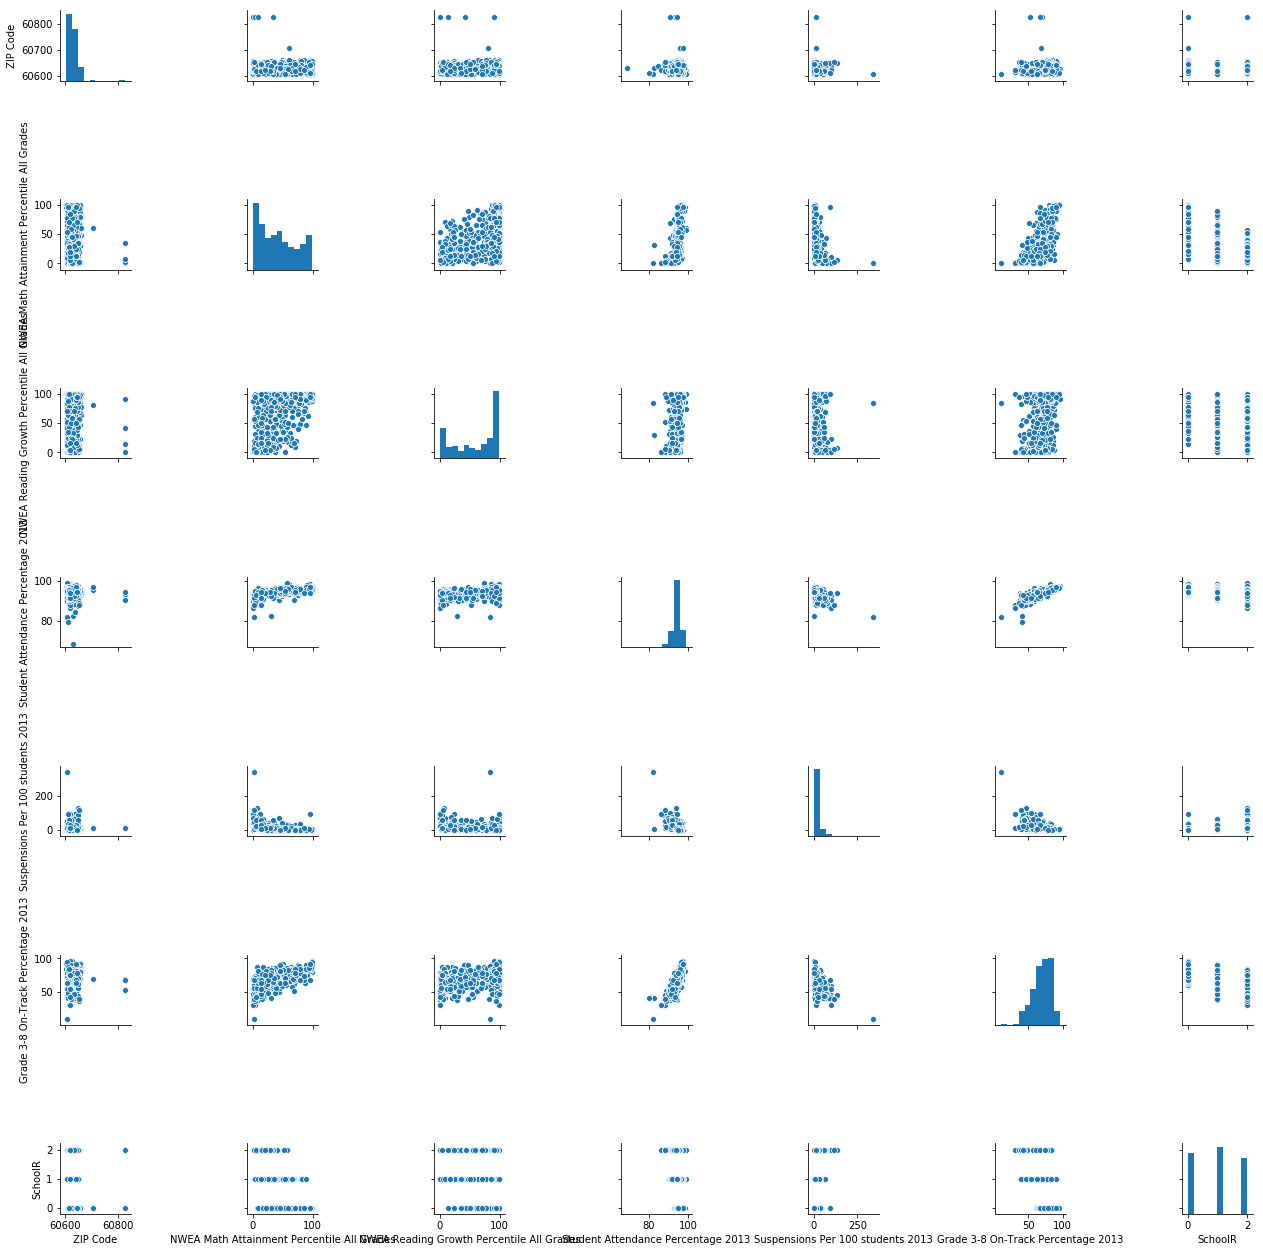

In [13]:
sns.pairplot(CPSData)

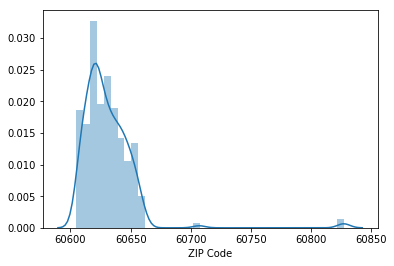

In [14]:
sns.distplot(CPSData['ZIP Code'])

# Supervised Machine Learning Program

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
CPSData2 = CPSData[['ZIP Code', 'Supportive Environment', 'NWEA Math Attainment Percentile All Grades', 'NWEA Reading Growth Percentile All Grades', 'Student Attendance Percentage 2013','SchoolR']]

In [17]:
CPSData2.head()

,ZIP Code,Supportive Environment,NWEA Math Attainment Percentile All Grades,NWEA Reading Growth Percentile All Grades,Student Attendance Percentage 2013,SchoolR
0,60612,WEAK,NaN,NaN,94.7,1.0
1,60655,NOT ENOUGH DATA,NaN,NaN,87.9,NaN
2,60656,NOT ENOUGH DATA,0.0,NaN,92.6,NaN
3,60619,NEUTRAL,99.0,99.0,96.7,0.0
4,60827,NEUTRAL,34.0,42.0,92.9,2.0


In [18]:
def School (series):
    if series == "NOT ENOUGH DATA":
        return 0
    if series == "VERY STRONG":
        return 1
    if series == "STRONG":
        return 2
    if series == "NEUTRAL":
        return 3
    if series == "WEAK":
        return 4
    if series == "VERY WEAK":
        return 5
CPSData2['Supportive EnvironmentR'] = CPSData2['Supportive Environment'].apply(School)

C:\Users\Toni\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
CPSData2.head()

,ZIP Code,Supportive Environment,NWEA Math Attainment Percentile All Grades,NWEA Reading Growth Percentile All Grades,Student Attendance Percentage 2013,SchoolR,Supportive EnvironmentR
0,60612,WEAK,NaN,NaN,94.7,1.0,4
1,60655,NOT ENOUGH DATA,NaN,NaN,87.9,NaN,0
2,60656,NOT ENOUGH DATA,0.0,NaN,92.6,NaN,0
3,60619,NEUTRAL,99.0,99.0,96.7,0.0,3
4,60827,NEUTRAL,34.0,42.0,92.9,2.0,3


In [20]:
CPSData3 = CPSData2.dropna(axis=0, how= 'any')

In [21]:
x = CPSData3[['ZIP Code', 'Supportive EnvironmentR', 'NWEA Math Attainment Percentile All Grades', 'NWEA Reading Growth Percentile All Grades', 'Student Attendance Percentage 2013']]

In [22]:
y= CPSData3['SchoolR']

In [23]:
x

,ZIP Code,Supportive EnvironmentR,NWEA Math Attainment Percentile All Grades,NWEA Reading Growth Percentile All Grades,Student Attendance Percentage 2013
3,60619,3,99.0,99.0,96.7
4,60827,3,34.0,42.0,92.9
5,60641,1,53.0,0.0,95.2
6,60608,3,3.0,0.0,92.3
7,60632,4,19.0,24.0,94.7
8,60632,2,86.0,89.0,94.5
9,60620,3,2.0,0.0,91.3
10,60641,3,50.0,47.0,93.8
11,60642,2,30.0,63.0,94.0
12,60657,4,30.0,47.0,93.9


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2)

In [25]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_train.shape)

(349, 5) (349,)
(88, 5) (349,)


# Linear Regression Model 

In [26]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
CPSPredictions = lm.predict(x_test)
CPSPredictions

array([ 1.4729331 ,  1.07863282,  0.80677096,  0.56681728,  0.05302066,
        0.74750525,  1.83199139,  0.671356  ,  0.59476259,  1.91137031,
        0.41045918,  1.07072216,  1.18074839,  0.84619839,  1.67685378,
        2.00635009,  1.79773972, -0.13033755,  2.47151545,  1.67453393,
       -0.14514334,  1.47776678,  0.18135528,  0.7180938 ,  1.96167369,
        1.43979004,  1.73255131,  1.40944506,  0.65375067,  1.5817144 ,
        1.08893898,  1.83955734,  1.08531439, -0.16308599,  1.92702451,
        1.5109962 ,  0.46353563,  0.72841207,  1.18645391,  0.65352932,
        1.92610431,  2.1565136 ,  1.26005123, -0.17007312,  1.92991078,
        1.42064492,  1.95346366,  0.87897368,  0.76469294,  0.76739072,
        1.71819445,  0.10063773,  1.08730061, -0.10415658,  1.90860551,
        1.16510458,  0.63360406,  2.01184725, -0.22672412,  0.37224712,
        0.9720167 ,  1.51229508,  0.31571203,  2.02970781,  1.29514268,
        1.04293334,  0.74910102,  0.23187199,  0.79418452,  0.84

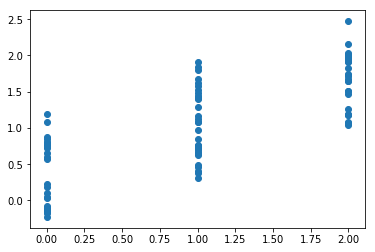

In [28]:
plt.scatter(y_test, CPSPredictions)

In [29]:
print("Score:", lm.score(x_test, y_test))

Score: 0.58143031482869


In [30]:
metrics.mean_absolute_error(y_test, CPSPredictions)

0.40728158632581474

In [31]:
metrics.mean_squared_error(y_test, CPSPredictions)

0.255984766137826

In [32]:
np.sqrt(metrics.mean_squared_error(y_test, CPSPredictions))

0.5059493711210895

# Cross Validation

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [34]:
kfold = KFold(3, True,)
for train, test in kfold.split(x,y):
    print ('train: %s, test: %s' % (train, test))

train: [  0   1   4   5   7  10  11  12  13  18  19  21  22  23  24  26  29  31
  33  34  35  36  37  38  40  43  44  47  48  49  51  52  53  54  55  56
  57  58  61  62  63  65  67  69  70  72  73  75  76  78  79  82  83  84
  89  90  93  94  96  97  98  99 103 105 106 107 109 111 114 115 116 117
 120 121 123 125 126 128 129 132 133 134 136 137 139 140 141 142 143 145
 147 148 149 150 151 153 154 155 156 158 159 162 164 165 166 167 170 171
 172 174 175 176 180 181 184 185 186 187 188 189 190 192 194 195 199 202
 203 204 205 206 207 210 212 213 215 216 218 219 220 224 225 227 229 230
 231 233 235 237 238 239 240 241 242 243 244 245 246 247 248 250 251 253
 254 255 256 258 259 260 261 262 263 264 266 268 270 271 272 273 277 278
 279 281 282 283 285 286 287 288 289 291 293 296 297 298 299 300 302 303
 304 305 306 307 310 311 312 313 314 315 316 317 318 321 322 323 324 325
 327 328 329 330 331 332 333 334 336 338 339 340 341 344 347 348 349 352
 354 356 357 358 359 360 362 363 364 365 366

In [35]:
print(cross_val_score(lm, x,y, cv=3))

[0.61131278 0.66128858 0.54138923]


## K-Means Clustering Model

In [37]:
from sklearn.cluster import KMeans

In [38]:
CPSData4 = CPSData[['ZIP Code', 'NWEA Math Attainment Percentile All Grades', 'NWEA Reading Growth Percentile All Grades', 'Student Attendance Percentage 2013','SchoolR']]

In [39]:
CPSData5 = CPSData4.dropna(axis=0, how= 'any')

In [40]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(CPSData5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

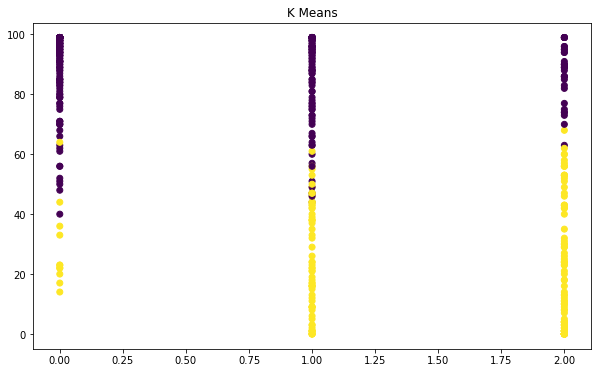

In [41]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(CPSData5['SchoolR'], CPSData5['NWEA Reading Growth Percentile All Grades'],c = kmeans.labels_, cmap = 'viridis')

In [42]:
kmeans.labels_

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,

In [43]:
CPSData5['Group'] = kmeans.labels_

C:\Users\Toni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
kmeans.cluster_centers_

array([[6.06304961e+04, 5.76445312e+01, 8.76640625e+01, 9.48609375e+01,
        5.97656250e-01],
       [6.06319061e+04, 1.93425414e+01, 2.16243094e+01, 9.33237569e+01,
        1.50828729e+00]])

In [45]:
kmeans.inertia_

623487.169980145

# K-Nearest Neighbors Model

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
scaler = StandardScaler()
scaler.fit(CPSData5.drop('SchoolR', axis =1))
scaledVariables = scaler.transform(CPSData5.drop('SchoolR', axis =1))
CPSDataScaled = pd.DataFrame(scaledVariables, columns= CPSData5.columns[:-1])

C:\Users\Toni\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Toni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
x = CPSDataScaled
y = CPSData5['SchoolR']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

# KNN Analysis

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [56]:
print(confusion_matrix(y_test, pred))

[[30 10  2]
 [12 24 14]
 [ 4  7 29]]


In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.65      0.71      0.68        42
         1.0       0.59      0.48      0.53        50
         2.0       0.64      0.72      0.68        40

   micro avg       0.63      0.63      0.63       132
   macro avg       0.63      0.64      0.63       132
weighted avg       0.62      0.63      0.62       132



In [58]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

## Plot the Array

Text(0, 0.5, 'Error Rate')

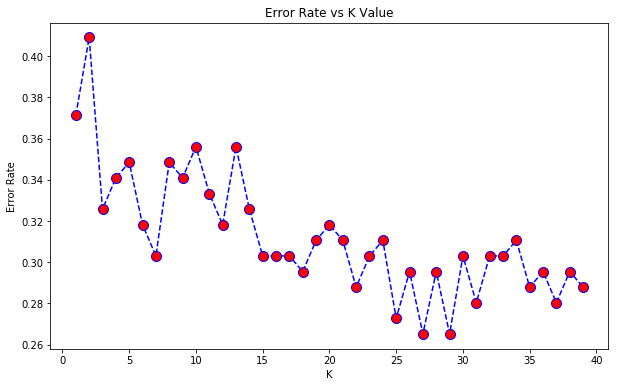

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel ("K")
plt.ylabel('Error Rate')

In [69]:
knn = KNeighborsClassifier(n_neighbors = 29)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [70]:
print(confusion_matrix(y_test, pred))

[[35  6  1]
 [ 6 32 12]
 [ 1  9 30]]


In [71]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        42
         1.0       0.68      0.64      0.66        50
         2.0       0.70      0.75      0.72        40

   micro avg       0.73      0.73      0.73       132
   macro avg       0.74      0.74      0.74       132
weighted avg       0.73      0.73      0.73       132



#  Decision Trees Machine Learning Model

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [73]:
decisionTreeCPS = DecisionTreeClassifier(random_state=76)
decisionTreeCPS.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=76,
            splitter='best')

In [74]:
treePredicitonsCPS = decisionTreeCPS.predict(x_test)

In [76]:
print(confusion_matrix(y_test, treePredicitonsCPS))
print(classification_report(y_test, treePredicitonsCPS))

[[21  6  0]
 [12 19  2]
 [ 2 12 14]]
              precision    recall  f1-score   support

         0.0       0.60      0.78      0.68        27
         1.0       0.51      0.58      0.54        33
         2.0       0.88      0.50      0.64        28

   micro avg       0.61      0.61      0.61        88
   macro avg       0.66      0.62      0.62        88
weighted avg       0.66      0.61      0.61        88



# Random Forest Model

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
forest = RandomForestClassifier(n_estimators = 500)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
forestPredicitionsCPS = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredicitionsCPS))
print(classification_report(y_test, forestPredicitionsCPS))

[[19  8  0]
 [ 8 21  4]
 [ 0  9 19]]
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        27
         1.0       0.55      0.64      0.59        33
         2.0       0.83      0.68      0.75        28

   micro avg       0.67      0.67      0.67        88
   macro avg       0.69      0.67      0.68        88
weighted avg       0.69      0.67      0.67        88

